**This notebook is primarily intened for Model Training, Tuning and Evaluation of The Multiclass CNN Model Light Version with less classes**

# Loading Dataset

In [2]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unrar x "/content/drive/MyDrive/Codes/eye_cropped_light.rar" "/tmp"

Streaming output truncated to the last 5000 lines.
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright286.jpg      49%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright287.jpg      49%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright288.jpg      49%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright289.jpg      49%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright29.jpg      49%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright290.jpg      49%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright291.jpg      50%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright292.jpg      50%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright293.jpg      50%  OK 
Extracting  /tmp/eye_cropped_light/training/right/eye_leftright294.jpg      50%  OK 
Extracting

# Data Preprocessing and Model Making

## Imports

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Train Validation Generator with Augmentation
Image Size = Width: 40, Height: 25 
Maybe Resize = 50,50

In [5]:
TRAINING_DIR = "/tmp/eye_cropped_light/training/"
training_datagen = ImageDataGenerator(
     rescale = 1./255,
)
# training_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	    rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=False,
#       fill_mode='nearest')

VALIDATION_DIR = "/tmp/eye_cropped_light/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(50,50),
	class_mode='categorical',
  batch_size=100
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(50,50),
	class_mode='categorical',
  batch_size=100
)

Found 8000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [5]:
train_generator.class_indices

{'down': 0, 'left': 1, 'middle': 2, 'right': 3, 'up': 4}

## Model Creation

### Basic Conv Model
Some Clarification:

1.   **Steps Per Epoch:** It is normally the number of unique samples in training set / batch size = 14400 / 128
2.   **Validation Steps:** Same as above. Replace training with validation.



In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 3)),
    #tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 61952)             0         
_________________________________________________________________
dropout (Dropout)            (None, 61952)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               3

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.Precision(), 
                                                                               tf.keras.metrics.Recall(),
                                                                               'accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=80, validation_data = validation_generator, verbose = 1, validation_steps=20)

#model.save("/tmp/models/conv_1.h5")

Epoch 1/25
80/80 [==============================] - 37s 62ms/step - loss: 0.6120 - precision: 0.8924 - recall: 0.8076 - accuracy: 0.8493 - val_loss: 0.1031 - val_precision: 0.9709 - val_recall: 0.9660 - val_accuracy: 0.9690
Epoch 2/25
80/80 [==============================] - 5s 58ms/step - loss: 0.1869 - precision: 0.9673 - recall: 0.9638 - accuracy: 0.9657 - val_loss: 0.0855 - val_precision: 0.9795 - val_recall: 0.9780 - val_accuracy: 0.9780
Epoch 3/25
80/80 [==============================] - 5s 59ms/step - loss: 0.0887 - precision: 0.9778 - recall: 0.9764 - accuracy: 0.9770 - val_loss: 0.0905 - val_precision: 0.9780 - val_recall: 0.9765 - val_accuracy: 0.9765
Epoch 4/25
80/80 [==============================] - 5s 59ms/step - loss: 0.0653 - precision: 0.9876 - recall: 0.9872 - accuracy: 0.9875 - val_loss: 0.0812 - val_precision: 0.9855 - val_recall: 0.9855 - val_accuracy: 0.9855
Epoch 5/25
80/80 [==============================] - 5s 59ms/step - loss: 0.0391 - precision: 0.9916 - recal

In [ ]:
14400 / 128, 3600 / 128

(112.5, 28.125)

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=150,
)

**Model Performace Evaluation**

In [8]:
history.history.keys()

dict_keys(['loss', 'precision', 'recall', 'accuracy', 'val_loss', 'val_precision', 'val_recall', 'val_accuracy'])

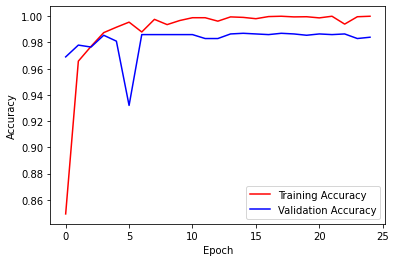

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
#plt.title('Training and validation accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

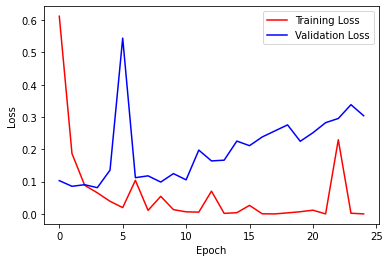

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
#plt.title('Training and validation accuracy')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

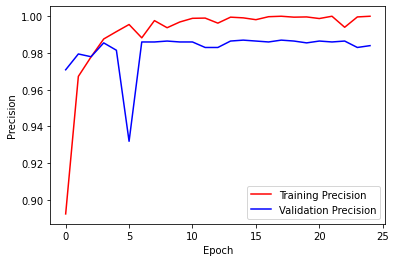

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(epochs, precision, 'r', label='Training Precision')
plt.plot(epochs, val_precision, 'b', label='Validation Precision')
#plt.title('Training and validation accuracy')
plt.ylabel("Precision")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

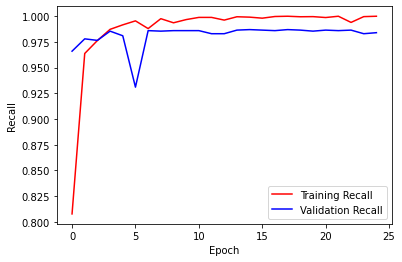

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs, recall, 'r', label='Training Recall')
plt.plot(epochs, val_recall, 'b', label='Validation Recall')
#plt.title('Training and validation accuracy')
plt.ylabel("Recall")
plt.xlabel("Epoch")
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/sample_data/conv_1')

In [ ]:
!unrar x "/content/sample_data/conv_1.rar" "/content/sample_data"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/sample_data/conv_1.rar

Creating    /content/sample_data/conv_1                               OK
Extracting  /content/sample_data/conv_1/keras_metadata.pb                  0%  OK 
Extracting  /content/sample_data/conv_1/saved_model.pb                     0%  OK 
Creating    /content/sample_data/conv_1/variables                     OK
Extracting  /content/sample_data/conv_1/variables/variables.data-00000-of-00001      43% 87% 99%  OK 
Extracting  /content/sample_data/conv_1/variables/variables.index         99%  OK 
Creating    /content/sample_data/conv_1/assets                        OK
All OK


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

class_list = ["down", "left", "middle", "right", "up"]

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(50, 50))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  #print(classes)
  for i in range(classes.shape[1]):
    if classes[0,i] == 1:
      print(class_list[i])                

Saving eye_leftup9.jpg to eye_leftup9.jpg
Saving eye_leftup928.jpg to eye_leftup928.jpg
Saving eye_leftup993.jpg to eye_leftup993.jpg
eye_leftup9.jpg
up
eye_leftup928.jpg
up
eye_leftup993.jpg
up


In [ ]:
for i in range(classes.shape[1]):
  if classes[0,i] == 1:
    print(class_list[i])

lower_left


In [ ]:
classes.shape[1]

9

# Confusion

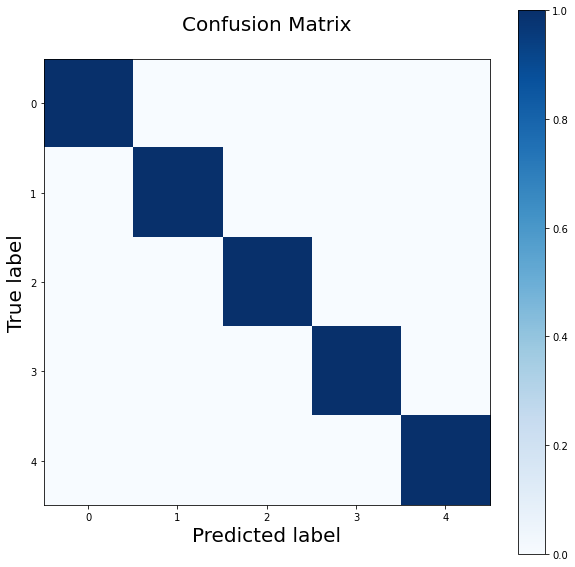

In [13]:
import numpy as np
import matplotlib.pyplot as plt
data = []     # store all the generated data batches
labels = []   # store all the generated label batches
max_iter = 36  # maximum number of iterations, in each iteration one batch is generated; the proper value depends on batch size and size of whole data
i = 0
for d, l in validation_generator:
    data.append(d)
    labels.append(l)
    i += 1
    if i == max_iter:
        break

data = np.array(data)
data = np.reshape(data, (data.shape[0]*data.shape[1],) + data.shape[2:])

labels = np.array(labels)
labels = np.reshape(labels, (labels.shape[0]*labels.shape[1],) + labels.shape[2:])


X_test, y_test = data, labels

y_preds = model.predict(X_test)


# Create a confusion matrix
#import itertools
from sklearn.metrics import confusion_matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(tf.argmax(tf.constant(y_test)), tf.argmax(tf.round(y_preds)))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#   plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
#            horizontalalignment="center",
#            color="white" if cm[i, j] > threshold else "black",
#            size=15)